Ilham Ramadhan Nur Ahmad

# STEP 1: Importing and Reading Dataset

Ini adalah dataset simulasi yang dibuat untuk regresi pembelajaran dan tugas yang berisi 8 variabel independen.

$x_1$ : Age

$x_2$ : Height

$x_3$ : Weight

$x_4$ : Occupation     

$x_5$ : Education Level

$x_6$ : Marital Status

$x_7$ : Income (USD)

$x_8$ : Favorite Color


Untuk Variable Dependent $y$ adalah Gender.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
import statsmodels.api as sm
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

import scipy
from scipy.stats.stats import pearsonr

In [2]:
df=pd.read_csv('gender.csv')
df

,Gender,Age,Height (cm),Weight (kg),Occupation,Education Level,Marital Status,Income (USD),Favorite Color,Unnamed: 9
0,male,32,175,70,Software Engineer,Master's Degree,Married,75000,Blue,NaN
1,male,25,182,85,Sales Representative,Bachelor's Degree,Single,45000,Green,NaN
2,female,41,160,62,Doctor,Doctorate Degree,Married,120000,Purple,NaN
3,male,38,178,79,Lawyer,Bachelor's Degree,Single,90000,Red,NaN
4,female,29,165,58,Graphic Designer,Associate's Degree,Single,35000,Yellow,NaN
...,...,...,...,...,...,...,...,...,...,...
126,female,32,170,64,Nurse,Associate's Degree,Single,60000,Orange,NaN
127,male,38,176,79,Project Manager,Bachelor's Degree,Married,90000,Black,NaN
128,female,27,162,55,Graphic Designer,Associate's Degree,Single,55000,Green,NaN
129,male,33,175,77,Sales Representative,Bachelor's Degree,Married,80000,Yellow,NaN


# STEP 2: Dataset Information

``Deleting NaN Column``
 
 **and**
 
``Finding Categories in gender parameter``

In [3]:
df1=df.drop(['Unnamed: 9'], axis=1)
df1

,Gender,Age,Height (cm),Weight (kg),Occupation,Education Level,Marital Status,Income (USD),Favorite Color
0,male,32,175,70,Software Engineer,Master's Degree,Married,75000,Blue
1,male,25,182,85,Sales Representative,Bachelor's Degree,Single,45000,Green
2,female,41,160,62,Doctor,Doctorate Degree,Married,120000,Purple
3,male,38,178,79,Lawyer,Bachelor's Degree,Single,90000,Red
4,female,29,165,58,Graphic Designer,Associate's Degree,Single,35000,Yellow
...,...,...,...,...,...,...,...,...,...
126,female,32,170,64,Nurse,Associate's Degree,Single,60000,Orange
127,male,38,176,79,Project Manager,Bachelor's Degree,Married,90000,Black
128,female,27,162,55,Graphic Designer,Associate's Degree,Single,55000,Green
129,male,33,175,77,Sales Representative,Bachelor's Degree,Married,80000,Yellow


In [4]:
df1.isnull().sum()

 Gender             0
 Age                0
 Height (cm)        0
 Weight (kg)        0
 Occupation         0
 Education Level    0
 Marital Status     0
 Income (USD)       0
 Favorite Color     0
dtype: int64

In [5]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 131 entries, 0 to 130
Data columns (total 9 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0    Gender           131 non-null    object
 1    Age              131 non-null    int64 
 2    Height (cm)      131 non-null    int64 
 3    Weight (kg)      131 non-null    int64 
 4    Occupation       131 non-null    object
 5    Education Level  131 non-null    object
 6    Marital Status   131 non-null    object
 7    Income (USD)     131 non-null    int64 
 8    Favorite Color   131 non-null    object
dtypes: int64(4), object(5)
memory usage: 9.3+ KB


In [6]:
df1[' Gender'].unique()

array([' male', ' female', 'male', 'female'], dtype=object)

In [7]:
parse_dict = {' male':'male',' female':'female'}
df1[' Gender'] = df1[' Gender'].replace(parse_dict)

parse_dict1 = { " Master's Degree":"Master's Degree"," Bachelor's Degree":"Bachelor's Degree",
              " Associate's Degree":"Associate's Degree", ' Doctorate Degree':'Doctorate Degree'}
df1[' Education Level'] = df1[' Education Level'].replace(parse_dict1)

parse_dict2 = { ' Married':'Married',' Single':'Single',
              ' Divorced':'Divorced'}
df1[' Marital Status'] = df1[' Marital Status'].replace(parse_dict2)

parse_dict3 = {' Software Engineer':'Software Engineer',
              ' Sales Representative':'Sales Representative',
              ' Doctor':'Doctor',
              ' Lawyer':'Lawyer',
              ' Graphic Designer':'Graphic Designer',
              ' Business Consultant'
              ' Marketing Specialist':'Marketing Specialist',
               ' CEO' :'CEO',
              ' Project Manager':'Project Manager', 
               ' Engineer':'Engineer', 
               ' Accountant':'Accountant', 
               ' Architect':'Architect',
               ' Nurse':'Nurse',
              ' Analyst':'Analyst', 
               ' Teacher':'Teacher',
               ' IT Manager':'IT Manager', 
               ' Writer':'Writer',
               ' Business Analyst':'Business Analyst'}
df1[' Occupation'] = df1[' Occupation'].replace(parse_dict3)

parse_dict5 = {' Blue':'Blue',
               ' Green':'Green',
               ' Purple':'Purple',
               ' Red':'Red',
               ' Yellow':'Yellow',
               ' Black' :'Black',
               ' Pink':'Pink',
               ' Orange':'Orange',
              ' Grey':'Grey'}
df1[' Favorite Color'] = df1[' Favorite Color'].replace(parse_dict5)

In [8]:
df1.groupby(' Gender').count()

,Age,Height (cm),Weight (kg),Occupation,Education Level,Marital Status,Income (USD),Favorite Color
Gender,,,,,,,,
female,63,63,63,63,63,63,63,63
male,68,68,68,68,68,68,68,68


In [9]:
df1.groupby(' Gender').mean()

,Age,Height (cm),Weight (kg),Income (USD)
Gender,,,,
female,30.523810,165.698413,59.269841,62936.507937
male,38.308824,180.147059,82.750000,121250.000000


In [10]:
df1.groupby(' Gender').median()

,Age,Height (cm),Weight (kg),Income (USD)
Gender,,,,
female,30.0,166.0,60.0,60000.0
male,38.0,180.0,82.5,95000.0


In [11]:
df1.groupby(' Gender').std()

,Age,Height (cm),Weight (kg),Income (USD)
Gender,,,,
female,3.609384,3.270765,3.857152,23787.278394
male,5.278108,3.714693,5.247245,91949.755099


# STEP 3: EDA

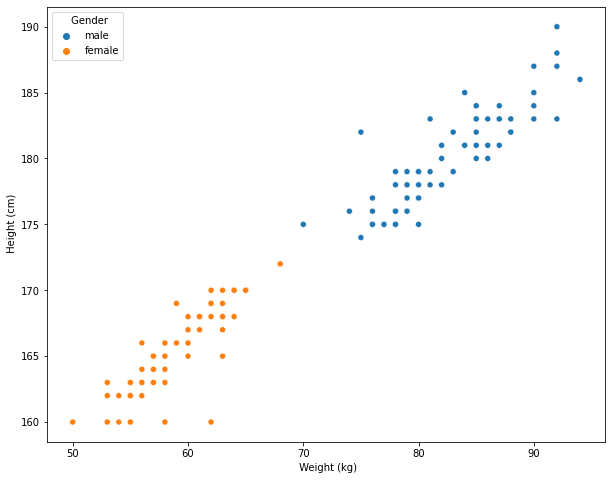

In [12]:
fig, ax = plt.subplots(figsize=(10, 8))
sns.scatterplot(data=df1, x=' Weight (kg)', y=' Height (cm)', hue=' Gender', ax=ax)
plt.show()

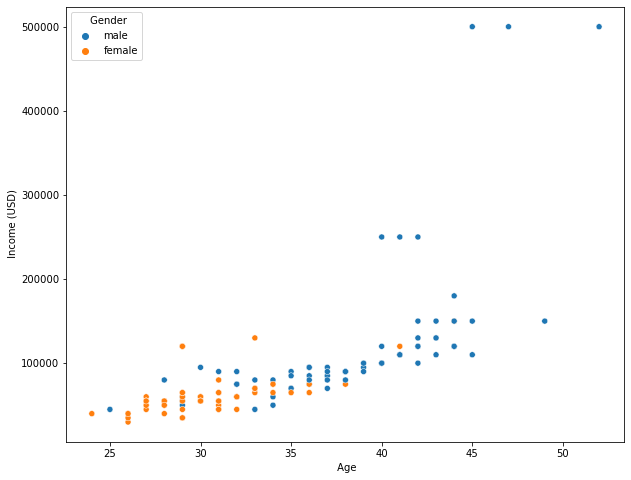

In [13]:
fig, ax = plt.subplots(figsize=(10, 8))
sns.scatterplot(data=df1, x=' Age', y=' Income (USD)', hue=' Gender', ax=ax)
plt.show()

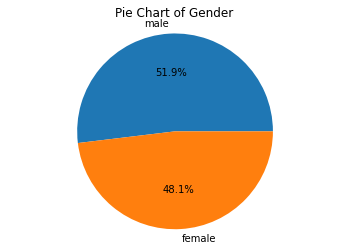

In [34]:
counts = df1[' Gender'].value_counts()
plt.pie(counts, labels=counts.index, autopct='%1.1f%%')
plt.title('Pie Chart of Gender')
plt.axis('equal')
plt.show()

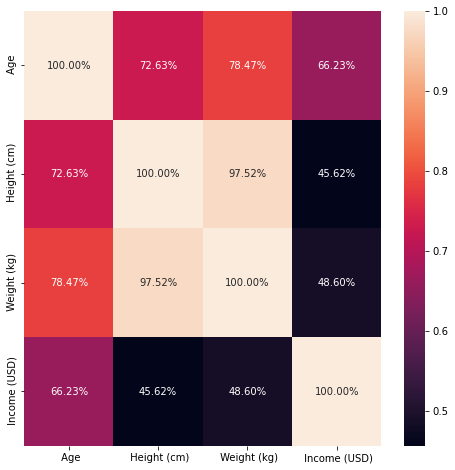

In [14]:
fig, ax = plt.subplots(figsize=(8,8))
sns.heatmap(df1.corr(), annot=True, fmt='.2%')
plt.show()

# STEP 4: Label and Coding

In [15]:
pd.set_option('display.max_columns', None)
df2 = pd.get_dummies(df1, columns=[' Occupation',' Education Level',' Marital Status',' Favorite Color'])
df2

,Gender,Age,Height (cm),Weight (kg),Income (USD),Occupation_ Business Consultant,Occupation_ Marketing Specialist,Occupation_Accountant,Occupation_Analyst,Occupation_Architect,Occupation_Business Analyst,Occupation_CEO,Occupation_Doctor,Occupation_Engineer,Occupation_Graphic Designer,Occupation_IT Manager,Occupation_Lawyer,Occupation_Marketing Specialist,Occupation_Nurse,Occupation_Project Manager,Occupation_Sales Representative,Occupation_Software Developer,Occupation_Software Engineer,Occupation_Teacher,Occupation_Writer,Education Level_Associate's Degree,Education Level_Bachelor's Degree,Education Level_Doctorate Degree,Education Level_Master's Degree,Marital Status_ Widowed,Marital Status_Divorced,Marital Status_Married,Marital Status_Single,Favorite Color_Black,Favorite Color_Blue,Favorite Color_Green,Favorite Color_Grey,Favorite Color_Orange,Favorite Color_Pink,Favorite Color_Purple,Favorite Color_Red,Favorite Color_Yellow
0,male,32,175,70,75000,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,1,0,0,1,0,0,0,0,0,0,0
1,male,25,182,85,45000,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0
2,female,41,160,62,120000,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,1,0,0
3,male,38,178,79,90000,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0
4,female,29,165,58,35000,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
126,female,32,170,64,60000,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0
127,male,38,176,79,90000,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0
128,female,27,162,55,55000,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0
129,male,33,175,77,80000,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1


# STEP 5: Gender Classification Analysis Using Logistics Regression

In [16]:
df3 = df2[[' Gender',' Age',' Marital Status_ Widowed',' Marital Status_Divorced',' Marital Status_Single']]

In [17]:
df3[" Gender"]=df3[" Gender"].replace(['male','female'],[1,0]) 

In [18]:
train, test = train_test_split(df3, test_size=0.3, random_state=100)
train_index = train.index
test_index = test.index

In [19]:
y_train = train[' Gender']
X_train = train[[' Age',' Marital Status_ Widowed',' Marital Status_Divorced',' Marital Status_Single']]
X_train = sm.add_constant(X_train)

model = sm.GLM(y_train, X_train, family=sm.families.Binomial())
logreg = model.fit()

In [20]:
logreg.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:                 Gender   No. Observations:                   91
Model:                            GLM   Df Residuals:                       88
Model Family:                Binomial   Df Model:                            2
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -40.962
Date:                Thu, 13 Apr 2023   Deviance:                       81.923
Time:                        13:36:23   Pearson chi2:                     101.
No. Iterations:                     5   Pseudo R-squ. (CS):             0.3843
Covariance Type:            nonrobust                                         
============================================================================================
                               coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------------
const                       -8.1313      2.556     -3.181      0.001     -13.141      -3.122
 Age                         0.2547      0.071      3.588      0.000       0.116       0.394
 Marital Status_ Widowed          0          0        nan        nan           0           0
 Marital Status_Divorced          0          0        nan        nan           0           0
 Marital Status_Single      -0.8372      0.641     -1.307      0.191      -2.093       0.418
============================================================================================
"""

In [21]:
train_pred=logreg.predict(X_train)

In [22]:
train['Gender_rate']=train_pred
train.head()

,Gender,Age,Marital Status_ Widowed,Marital Status_Divorced,Marital Status_Single,Gender_rate
45,0,26,0,0,1,0.087335
23,0,27,0,0,1,0.109884
123,1,40,0,0,0,0.886568
111,1,42,0,0,0,0.928610
20,1,29,0,0,1,0.170434


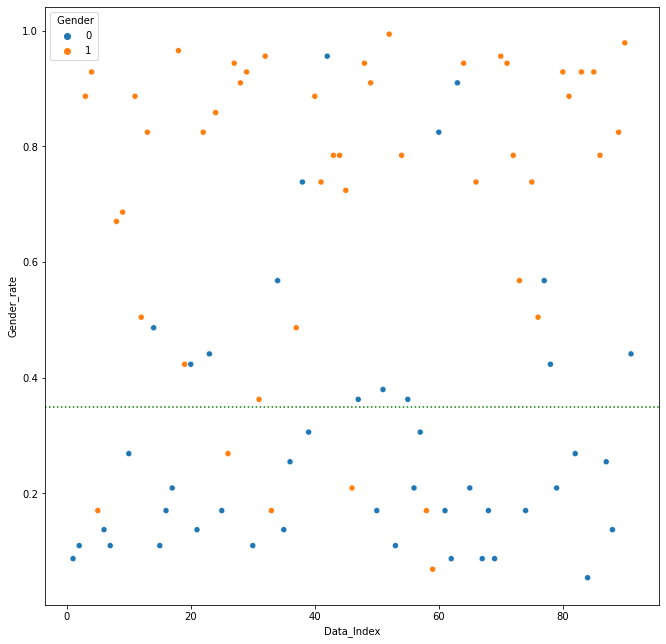

In [23]:
fig, ax = plt.subplots(figsize=(11,11))
train['Data_Index'] = range(1, len(train)+1)
sns.scatterplot(data=train, x='Data_Index', y='Gender_rate', hue=' Gender')
plt.axhline(y=0.35,color='green',linestyle=':')
plt.show()

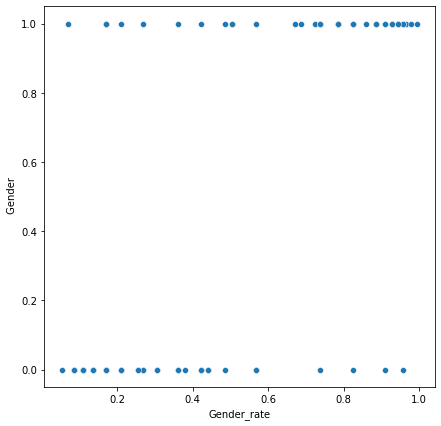

In [24]:
fig,ax = plt.subplots(figsize=(7,7))
sns.scatterplot(data=train,x='Gender_rate',y=' Gender')
plt.show()

In [25]:
cut_off = 0.51 #male
train['Prediction'] = np.where(train['Gender_rate'] < cut_off,0,1)
train.head()

,Gender,Age,Marital Status_ Widowed,Marital Status_Divorced,Marital Status_Single,Gender_rate,Data_Index,Prediction
45,0,26,0,0,1,0.087335,1,0
23,0,27,0,0,1,0.109884,2,0
123,1,40,0,0,0,0.886568,3,1
111,1,42,0,0,0,0.928610,4,1
20,1,29,0,0,1,0.170434,5,0


In [26]:
cs_train=pd.crosstab(train[' Gender'],train['Prediction'])
cs_train

Prediction,0,1
Gender,,
0,38,6
1,11,36


In [27]:
TH_train = cs_train.iloc[0,0]
TP_train = cs_train.iloc[1,1]
FN_train = cs_train.iloc[1,0]
FP_train = cs_train.iloc[0,1]

accuracy_train= (TP_train+TP_train)/(TH_train+TP_train+FN_train+FP_train)
sensitivity_train = TP_train/(TP_train+FN_train)
precision_train= TP_train/(TP_train+FP_train)

print('The model of accuracy of training data :',f'{accuracy_train:0.2%}')
print('The model of sensitivity of training data :',f'{sensitivity_train:0.2%}')
print('The model of sensitivity of testing data :',f'{precision_train:0.2%}')

The model of accuracy of training data : 79.12%
The model of sensitivity of training data : 76.60%
The model of sensitivity of testing data : 85.71%


# STEP 6: Model Evaluation (Akurasi)

## TEST

In [28]:
X_test = test[[' Age',' Marital Status_ Widowed',' Marital Status_Divorced',' Marital Status_Single']]
X_test = sm.add_constant(X_test)

test_pred = logreg.predict(X_test)

In [29]:
test["Gender_rate"] = test_pred
test.head()

,Gender,Age,Marital Status_ Widowed,Marital Status_Divorced,Marital Status_Single,Gender_rate
11,1,44,1,0,0,0.955845
85,0,29,0,0,1,0.170434
106,0,27,0,0,1,0.109884
43,0,32,0,0,1,0.306083
126,0,32,0,0,1,0.306083


In [30]:
test["Prediction"] = np.where(test["Gender_rate"] < cut_off,0,1)
test.head()

,Gender,Age,Marital Status_ Widowed,Marital Status_Divorced,Marital Status_Single,Gender_rate,Prediction
11,1,44,1,0,0,0.955845,1
85,0,29,0,0,1,0.170434,0
106,0,27,0,0,1,0.109884,0
43,0,32,0,0,1,0.306083,0
126,0,32,0,0,1,0.306083,0


In [31]:
cm_test = pd.crosstab(test[" Gender"],test["Prediction"])
cm_test

Prediction,0,1
Gender,,
0,15,4
1,4,17


In [32]:
TN_test = cm_test.iloc[0,0]
TP_test = cm_test.iloc[1,1]
FN_test = cm_test.iloc[1,0]
FP_test = cm_test.iloc[0,1]

accuracy_test = (TN_test + TP_test) / (TN_test + TP_test + FN_test + FP_test)
sensitivity_test = TP_test / (TP_test + FN_test)
precision_test = TP_test / (TP_test + FP_test)

print("The model accuracy of the testing data: ", f'{accuracy_test: 0.2%}')
print("The model sensitivity of the testing data: ", f'{sensitivity_test: 0.2%}')
print("The model precision of the testing data: ", f'{precision_test: 0.2%}')

The model accuracy of the testing data:   80.00%
The model sensitivity of the testing data:   80.95%
The model precision of the testing data:   80.95%


In [33]:
metrics=["Accuracy","Sensitivity","Precision"]
performance_train=[accuracy_train,sensitivity_train,precision_train]
performance_test=[accuracy_test,sensitivity_test,precision_test]
performance1=pd.DataFrame({"Metrics":metrics,"Training Data":performance_train,"Testing Data":performance_test})
performance1.style.format({"Training Data":"{:,.2%}","Testing Data":"{:.2%}"})

,Metrics,Training Data,Testing Data
0,Accuracy,79.12%,80.00%
1,Sensitivity,76.60%,80.95%
2,Precision,85.71%,80.95%
